## Problem Statement 4
### Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages: 
    a. Loading and preprocessing the image data 
    b. Defining the model's architecture 
    c. Training the model
    d. Estimating the model's performance

In [1]:

from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## a. Loading and preprocessing the data.

In [3]:
((train_images, train_labels),(test_images, test_labels))=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 113s 1us/step


In [4]:
train_images=train_images/255.0
test_images=test_images/255.0

In [5]:
type(train_images)

numpy.ndarray

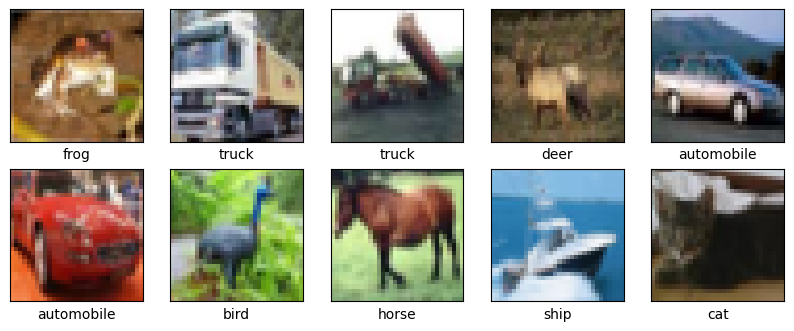

In [6]:
class_names = ['airplpane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## b. Defining the model's architecture 

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [10]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD
sgd=SGD(0.01)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [12]:
epoch=10
h=model.fit(train_images,train_labels, validation_data=(test_images,test_labels), epochs=epoch)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1825 - loss: 2.1897 - val_accuracy: 0.3512 - val_loss: 1.8032
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3876 - loss: 1.7194 - val_accuracy: 0.4154 - val_loss: 1.6821
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4593 - loss: 1.5084 - val_accuracy: 0.5039 - val_loss: 1.3810
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5091 - loss: 1.3719 - val_accuracy: 0.5112 - val_loss: 1.3751
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5498 - loss: 1.2693 - val_accuracy: 0.5329 - val_loss: 1.3077
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5735 - loss: 1.2059 - val_accuracy: 0.5768 - val_loss: 1.1815
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6018 - loss: 1.1316 - val_accuracy: 0.6102 - val_loss: 1.1218
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6291 -

# Model performance

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6453 - loss: 1.0244
Test Loss: 1.0281476974487305, Test Accuracy: 0.6399999856948853


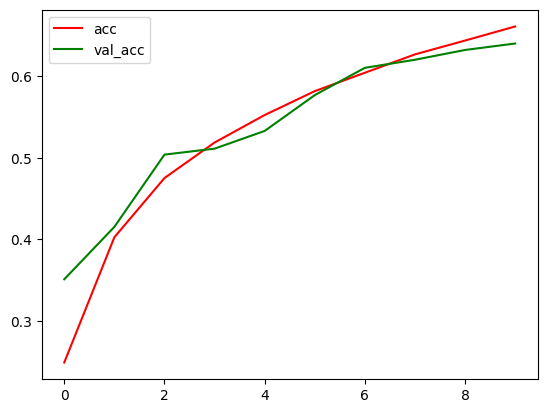

In [16]:
plt.plot(h.history['accuracy'], label='acc', color='red')
plt.plot(h.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [17]:
print(h.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


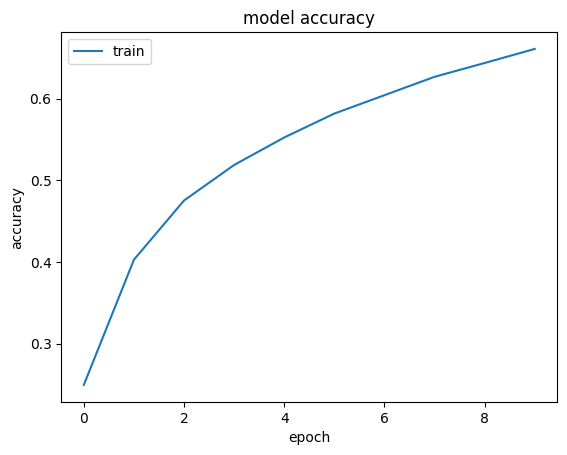

In [18]:
plt.plot(h.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


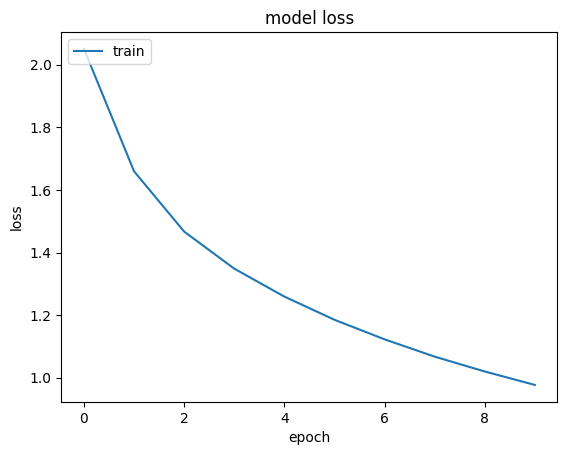

In [19]:
plt.plot(h.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
2


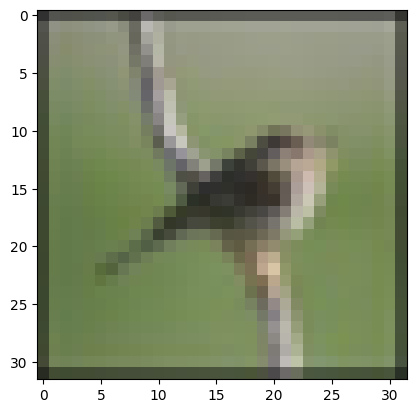

In [20]:
image_index = 3333
plt.imshow(test_images[image_index].reshape(32, 32, 3),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())